
<div align="center"><img width="375" height="35" src="https://t1nc.org/wp-content/uploads/2018/08/SAN-ANTONIO-THUMB-shutterstock_448844578-660--768x614.jpg" /> </div> 


<div align="center"> <h1>Individual Project - Predicting Gender based on Salary Data</h1> 
  <h6> by David Berchelmann -- April 9, 2021 </h6> </div>
  
  ------------------------------------------------


---

<h1> Welcome! </h1>

The following jupyter notebook will take you through my individual project focusing on the relationship between gender and salary for the city of San ANtonio. The dataset comes from data.world and can be accessed here https://data.world/amillerbernd/san-antonio-city-salary-data or via csv from my git hub. 

All of the files and notebooks for this project can be accessed via the github repostiory located at --> https://github.com/DBerchelmann/employee-classification

For ease of reading, many of the large coding sections have been minimzed to allow for a better scrolling experience. If you would like to enlarge a cell to see the data inside, please click on the three dots (<b>...</b>) for the specific cell. To reduce the cell, click the blue box to the left of the selected cell.

----

<a id='back'></a>
### Quick Links to Sections within this Notebook

- [Executive Summary](#BC)
- [Acquire Data](#AD)
- [Prepare Data](#PD)
- [Explore Data](#Explore)
- [Data Dictionary](#DY)
- [Hypothesis Testing](#Hypo)
- [Clustering](#CD)
- [Modeling](#Model)
- [Evaluate](#Eval)
- [Recommendations & Key Takeaways](#Conclusion)

<h1> Executive Summary </h1>

<a id='BC'></a>

[back to top](#back)

------

<h4><b>The Problem</b></h4>

- Is there a gender pay gap at the city of San Antonio?

<h4><b>The Goal</b></h4>

- Use classification to determine if gender can be predicted using salary data from fiscal year 2016

<h4><b>The Process</b></h4>

  * Acquire the Data
  * Prepare 
  * Explore 
  * Model
  * Create Recommendations Based On Findings 
  
<h4><b>The Findings</b></h4>

- Exploration revealed that there is definitley a gender pay gap
- My Random Forest classification model accurately predicted gender 76% of the time beating the baseline of 65%
- Not only is there gender pay gap but there is also a discrepancy in pay by ethnicity
- More indepth analysis needs to be done 
- Modeling can be further refined by splitting up the salaries by department and investigating pay gap discrepancies.
     - <i>Baseline Accuracy --> 65% </i>
     - <b>Random Forest Accuracy on out of sample test data --> 76%</b>

    
    


-------


-----
<h3> Environment Setup</h3>

----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats
from pandas.api.types import is_string_dtype, is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Graph
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import plotly.express as px
from datetime import date 
from wrangle import new_city_data, clean_city, missing_zero_values_table, train_validate_test_split
import explore

from model import run_model

<h4> Data Validation </h4>

 - Before the data was brought in through wrangle.py, I looked into via excel. Below are a few of the findings:
     - The hire date column needed to be formatted to a readable format
     - There would be some opportunity to clean up the columns with varying decimal points
     - There would also be an opportunity create more categorical features by splitting some data up

---
<h3><u>Acquire the Data</u></h3>

----

<a id='AD'></a>

[back to top](#back)

In [2]:
df = new_city_data()

In [3]:
print(f'Our original dataframe is coming in with {df.shape[0]} rows and {df.shape[1]} columns.')

Our original dataframe is coming in with 11923 rows and 17 columns.


In [4]:
df.describe()

,FY16 ANNUAL SALARY2,FY16 BASE PAY3,FY16 LEAVE PAYOUT4,FY16 OTHER5,FY16 OVERTIME6,FY16 GROSS EARNINGS7,FY16 ADDITIONAL BENEFITS8,FY16 TOTAL COMPENSATION9
count,11923.000000,11923.000000,11923.000000,11923.000000,11923.000000,11923.000000,11923.000000,11923.000000
mean,51665.146688,46521.141886,1592.511874,5246.367811,4124.500218,57484.521789,24065.967890,81550.489680
std,22426.198015,26318.791088,2211.263406,7549.287121,8160.922331,36791.795606,16849.396949,52549.340694
min,18200.000000,0.000000,0.000000,-100.000000,-239.450000,0.000000,0.000000,0.000000
25%,32607.380000,30025.240000,0.000000,53.080000,0.000000,32118.335000,14187.673405,46409.635645
50%,49188.100000,46419.880000,660.300000,825.420000,356.390000,51073.580000,17811.979020,68812.363670
75%,65155.490000,64428.000000,2220.640000,9805.380000,4713.355000,85713.080000,44431.451890,128011.598200
max,425000.000000,414615.380000,16947.960000,97354.890000,68212.290000,511970.270000,75379.480000,587349.750000


In [5]:
missing_zero_values_table(df)

Your selected dataframe has 17 columns and 11923 Rows.
There are 1 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
MIDDLE NAME,0,5662,47.5,5662,47.5,object
FIRST NAME,0,0,0.0,0,0.0,object
FY16 GROSS EARNINGS7,32,0,0.0,32,0.3,float64
ETHNIC ORIGIN10,0,0,0.0,0,0.0,object
GENDER,0,0,0.0,0,0.0,object
BUSINESS AREA,0,0,0.0,0,0.0,object
JOB TITLE,0,0,0.0,0,0.0,object
FY16 TOTAL COMPENSATION9,15,0,0.0,15,0.1,float64
FY16 ADDITIONAL BENEFITS8,18,0,0.0,18,0.2,float64
FY16 OVERTIME6,4562,0,0.0,4562,38.3,float64


-----
<h3><u> Initial Thoughts</u> </h3>

- Really need to clean this data set up before doing any initial looking exploration
- Going to rename columns for readability
- Clean up numbers
- Need to get rid of first, middle, and last names



----


<h3><u>Prepare the Data</u></h3>

----

<a id='PD'></a>

[back to top](#back)

In [6]:
df= clean_city(df)

To prep this data for exploration, the following was done:

- Dropped Duplicates
- Re-named columns for readability
- Removed Salary Outliers from the top end by limiting the record to anything with an annual salary less than $200_000
- Convert hire_date data type to datetime data type
- Create new column called year
- Created a 'today' variable to calculate a new column called years_employed
- Rounded all numeric columns down to just two decimal places
- Seperated job_title into job_id & job name column using split
- Dropped unessary columns (['first_name', 'middle_name', 'last_name', 'dept_subgroup', 'year', 'job_title', 'hire_date'])
- Cleaned up ethnicity column and replace values with similiar groupings under one descriptor
- Created dummy columns of encoded categorical variabl
- Combine the original data frame with the new dummies columns

-----
<h3><u> Prep Takeaways </u> </h3>

----

- The cleaning process was fairly straight forward and the lack of nulls and zeros made it less cumbersome than other data sets.
- For the upcoming exploration, annual_salary, ethnicity, and gender will probably be the most beneficial features to explore
- The dummies columns can be useufl for bivariate exploration

-------

<h3>Exploration</h3>

----

<b>Univariate</b>

- Take a look at some univariate exploration before training the data

In [7]:
cat_vars = ['gender', 'ethnicity_BLACK', 'ethnicity_HISPANIC', 'ethnicity_WHITE', 'ethnicity_ASIAN', 'ethnicity_NATIVE AMERICAN', 'ethnicity_NATIVE HAWAIIAN', 'ethnicity_OTHER']
quant_vars = ['annual_salary_2016','total_compensation', 'years_employed']

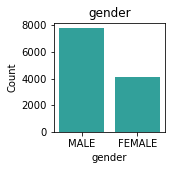

        gender  Count  Percent
MALE      MALE   7777     65.3
FEMALE  FEMALE   4133     34.7
_________________________________________________________________


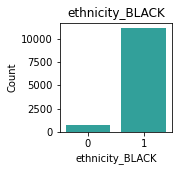

   ethnicity_BLACK  Count  Percent
0                1  11123    93.39
1                0    787     6.61
_________________________________________________________________


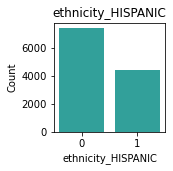

   ethnicity_HISPANIC  Count  Percent
1                   0   7446    62.52
0                   1   4464    37.48
_________________________________________________________________


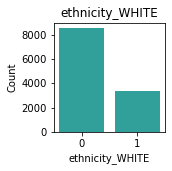

   ethnicity_WHITE  Count  Percent
0                0   8520    71.54
1                1   3390    28.46
_________________________________________________________________


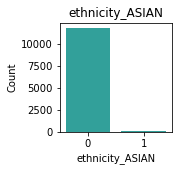

   ethnicity_ASIAN  Count  Percent
0                0  11769    98.82
1                1    141     1.18
_________________________________________________________________


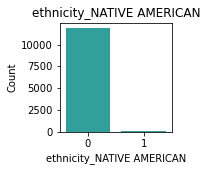

   ethnicity_NATIVE AMERICAN  Count  Percent
0                          0  11864    99.61
1                          1     46     0.39
_________________________________________________________________


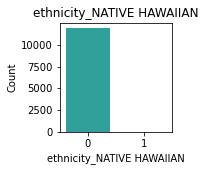

   ethnicity_NATIVE HAWAIIAN  Count  Percent
0                          0  11897    99.89
1                          1     13     0.11
_________________________________________________________________


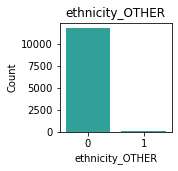

   ethnicity_OTHER  Count  Percent
0                0  11823    99.27
1                1     87     0.73
_________________________________________________________________


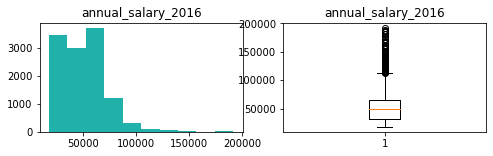

count     11910.000000
mean      51482.081360
std       21571.715401
min       18200.000000
25%       32607.000000
50%       49188.000000
75%       65015.000000
max      191900.000000
Name: annual_salary_2016, dtype: float64


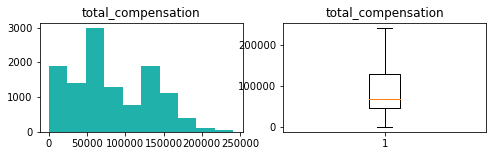

count     11910.000000
mean      81364.377330
std       52090.840869
min           0.000000
25%       46400.750000
50%       68788.000000
75%      127947.750000
max      241289.000000
Name: total_compensation, dtype: float64


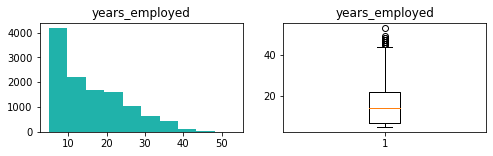

count    11910.000000
mean        15.564484
std          9.148673
min          5.000000
25%          7.000000
50%         14.000000
75%         22.000000
max         53.000000
Name: years_employed, dtype: float64


In [8]:
explore.explore_univariate(df, cat_vars, quant_vars)

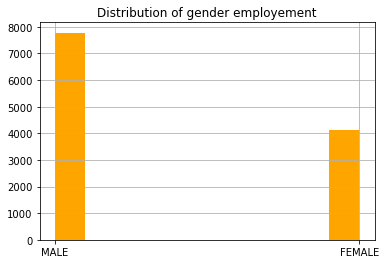

In [9]:
plt.figure(figsize=(16,12))
df['gender'].hist(color='orange', figsize=(6,4))

plt.title('Distribution of gender employement')
plt.show()

<AxesSubplot:>

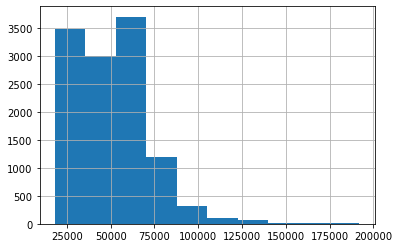

In [10]:
df.annual_salary_2016.hist()

<AxesSubplot:>

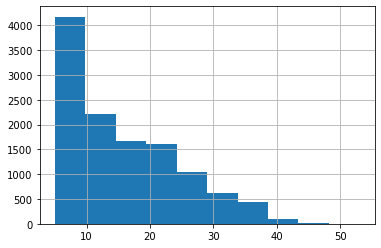

In [11]:
df.years_employed.hist()

<AxesSubplot:>

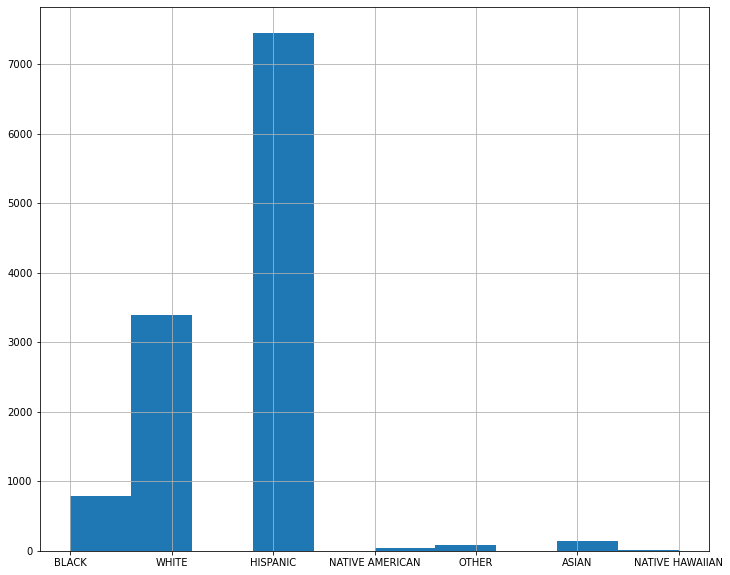

In [12]:
plt.figure(figsize=(12,10))
df.ethnicity.hist()

In [13]:
df.ethnicity.value_counts()

HISPANIC           7446
WHITE              3390
BLACK               787
ASIAN               141
OTHER                87
NATIVE AMERICAN      46
NATIVE HAWAIIAN      13
Name: ethnicity, dtype: int64

----
<h3>Train the Data</h3>

---

In [14]:
train, validate, test = train_validate_test_split(df, seed=123)

In [15]:
train.shape, validate.shape, test.shape

((6669, 21), (2859, 21), (2382, 21))

In [16]:
train.ethnicity.value_counts()

HISPANIC           4200
WHITE              1880
BLACK               427
ASIAN                81
OTHER                48
NATIVE AMERICAN      28
NATIVE HAWAIIAN       5
Name: ethnicity, dtype: int64

In [17]:
train.loc[df['annual_salary_2016'] > 150_000].gender.value_counts()

MALE      10
FEMALE     5
Name: gender, dtype: int64

There are twice as many men making more than $150,000 at the city than women

In [18]:
train.loc[df['annual_salary_2016'] < 35_000].gender.value_counts()

FEMALE    995
MALE      951
Name: gender, dtype: int64

Those making less than $35,000 is a majority female, although the distribution is almost even

In [19]:
train.loc[train['annual_salary_2016'] > 150_000].ethnicity.value_counts()

WHITE       9
HISPANIC    6
Name: ethnicity, dtype: int64

Those who idenfity their ethnicity as 'WHITE' make up a majority of those who make more than $150,000 annually

In [20]:
train.loc[train['annual_salary_2016'] >= 50_000].ethnicity.value_counts()

HISPANIC           1643
WHITE              1347
BLACK               161
ASIAN                49
OTHER                27
NATIVE AMERICAN      19
NATIVE HAWAIIAN       2
Name: ethnicity, dtype: int64

- A majority of people who idenfity as white, who are employed by the city, at or make more than $50,000 a year.

- Other demographics with a majority of respondents who make more than $50,000 include those who identify as Asian, Native American, Native Hawaiaan, & Other.

- Less than half of the employees at the city who identify as Black or Hispanic make more than 50,000. 

- There is wider range of salaries within those who idenfity as hispanic since they make up a majority of the employees at the city

----

<b> Explore Analysis Continued</b>

---

We previously had looked at demographic and salary, let's visualize this.

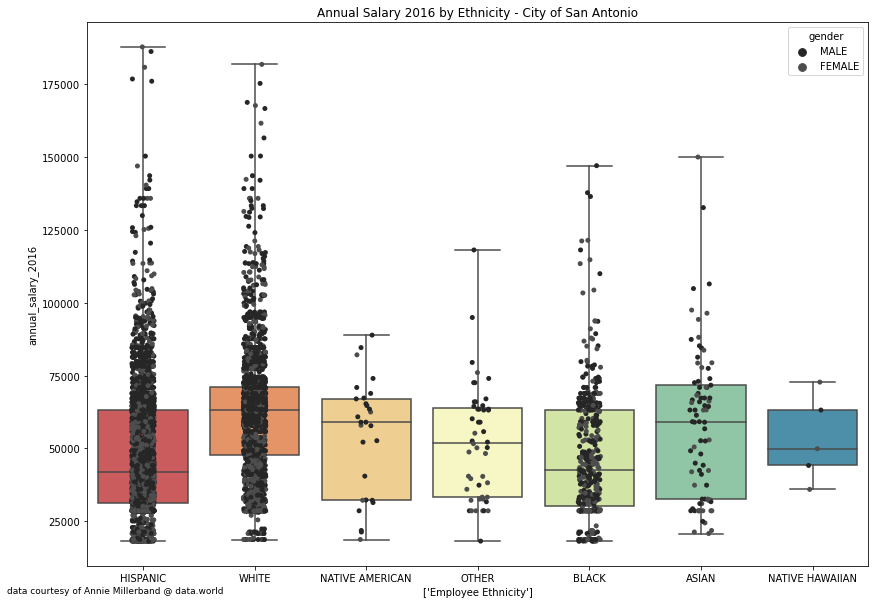

In [21]:
plt.figure(figsize=(14,10))



ax = sns.boxplot(x="ethnicity", y="annual_salary_2016", data=train,whis=np.inf, palette="Spectral" )
ax = sns.stripplot(x="ethnicity", y="annual_salary_2016", data=train, color=".3",  hue='gender')
ax.set_xlabel(['Employee Ethnicity'])
plt.title('Annual Salary 2016 by Ethnicity - City of San Antonio')
plt.annotate('data courtesy of Annie Millerband @ data.world', (0,0), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top')


plt.show()

----

The visual confirms the value counts that were done previously

----

Let's also take a look at gender and salary disparity

---

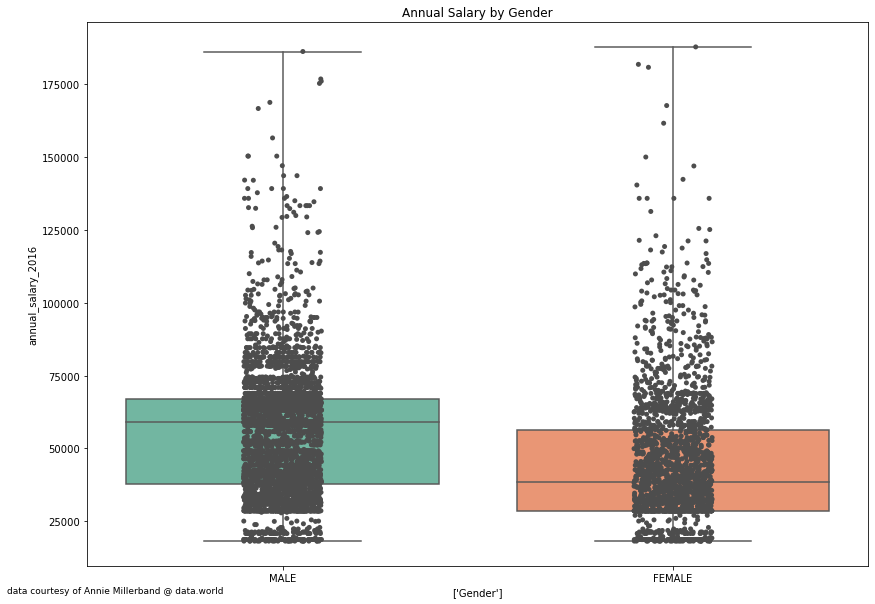

In [22]:

plt.figure(figsize=(14,10))



ax = sns.boxplot(x="gender", y="annual_salary_2016", data=train,whis=np.inf, palette="Set2" )
ax = sns.stripplot(x="gender", y="annual_salary_2016", data=train, color=".3")
ax.set_xlabel(['Gender'])
plt.title('Annual Salary by Gender')
plt.annotate('data courtesy of Annie Millerband @ data.world', (0,0), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top')


plt.show()

In [23]:
train[['annual_salary_2016', 'years_employed']].describe().T

,count,mean,std,min,25%,50%,75%,max
annual_salary_2016,6669.0,51371.332734,21702.709941,18200.0,32607.0,49188.0,65355.0,187788.0
years_employed,6669.0,15.591093,9.139950,5.0,7.0,14.0,22.0,49.0


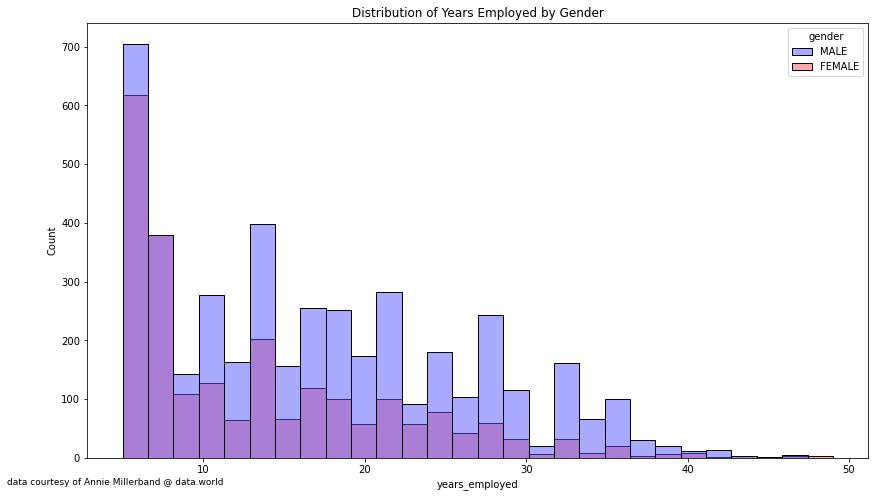

In [24]:

plt.figure(figsize=(14,8))
sns.histplot(data = train, x='years_employed', hue='gender', palette='seismic')

plt.title('Distribution of Years Employed by Gender')
plt.annotate('data courtesy of Annie Millerband @ data.world', (0,0), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

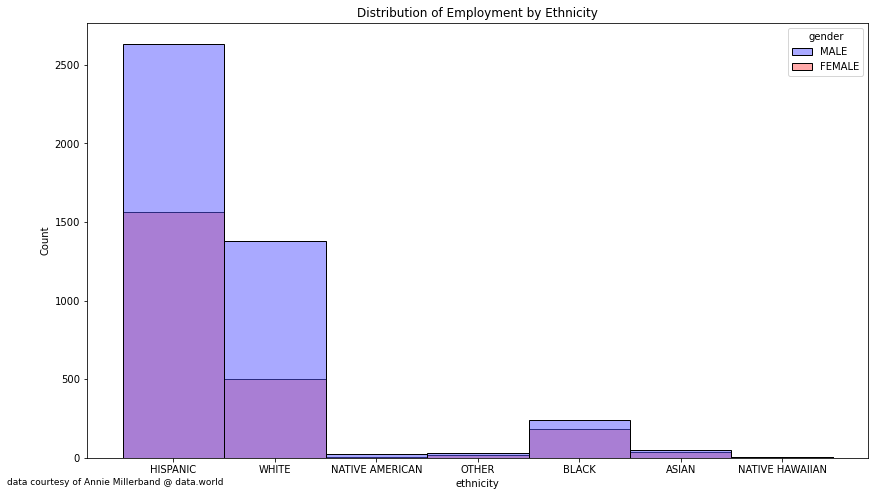

In [25]:
plt.figure(figsize=(14,8))
sns.histplot(data = train, x='ethnicity', hue='gender', palette='seismic')

plt.title('Distribution of Employment by Ethnicity')
plt.annotate('data courtesy of Annie Millerband @ data.world', (0,0), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

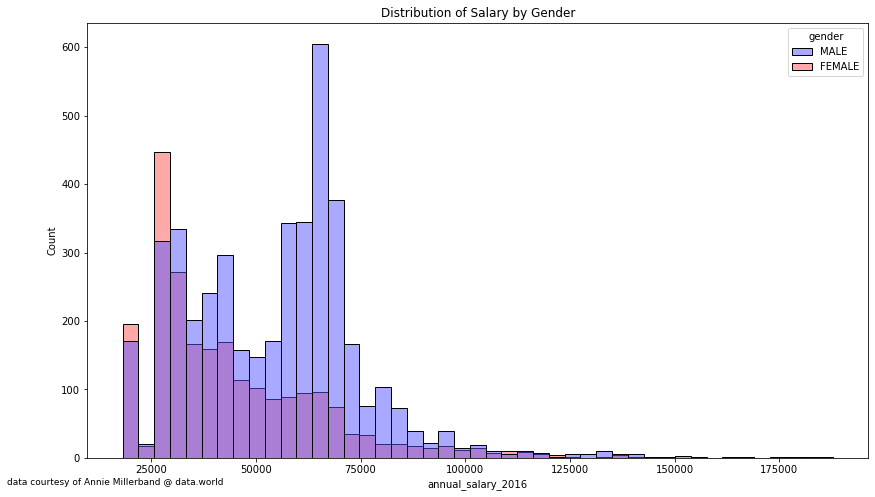

In [26]:
plt.figure(figsize=(14,8))
sns.histplot(data = train, x='annual_salary_2016', hue='gender', palette='seismic', bins = 45)

plt.title('Distribution of Salary by Gender')
plt.annotate('data courtesy of Annie Millerband @ data.world', (0,0), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

Text(-80, -20, 'data courtesy of Annie Millerband @ data.world')

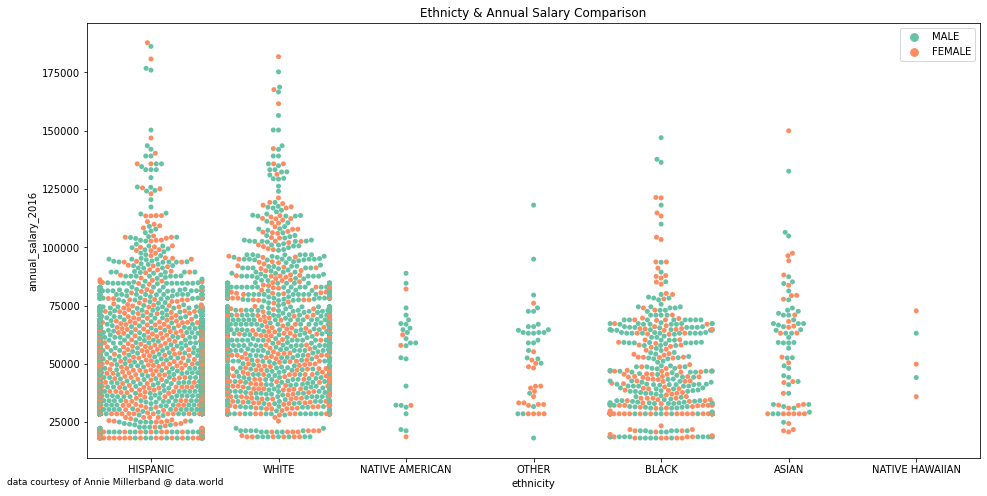

In [27]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="ethnicity", y="annual_salary_2016", data=train, hue="gender", palette="Set2")
plt.legend()
plt.title('Ethnicty & Annual Salary Comparison')
plt.annotate('data courtesy of Annie Millerband @ data.world', (0,0), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top')

Text(-80, -20, 'data courtesy of Annie Millerband @ data.world')

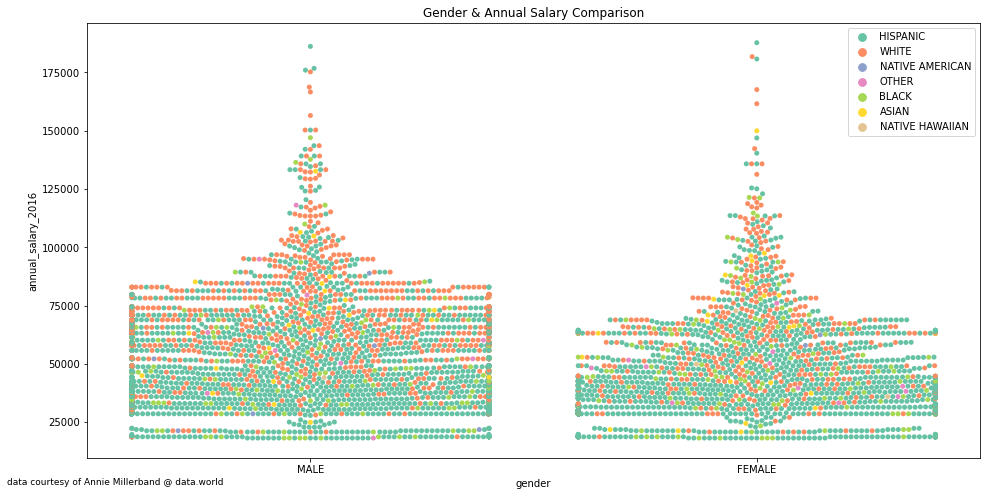

In [28]:
plt.figure(figsize=(16,8))
sns.swarmplot(x='gender', y="annual_salary_2016", data=train, hue="ethnicity", palette="Set2")
plt.legend()
plt.title('Gender & Annual Salary Comparison')
plt.annotate('data courtesy of Annie Millerband @ data.world', (0,0), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top')

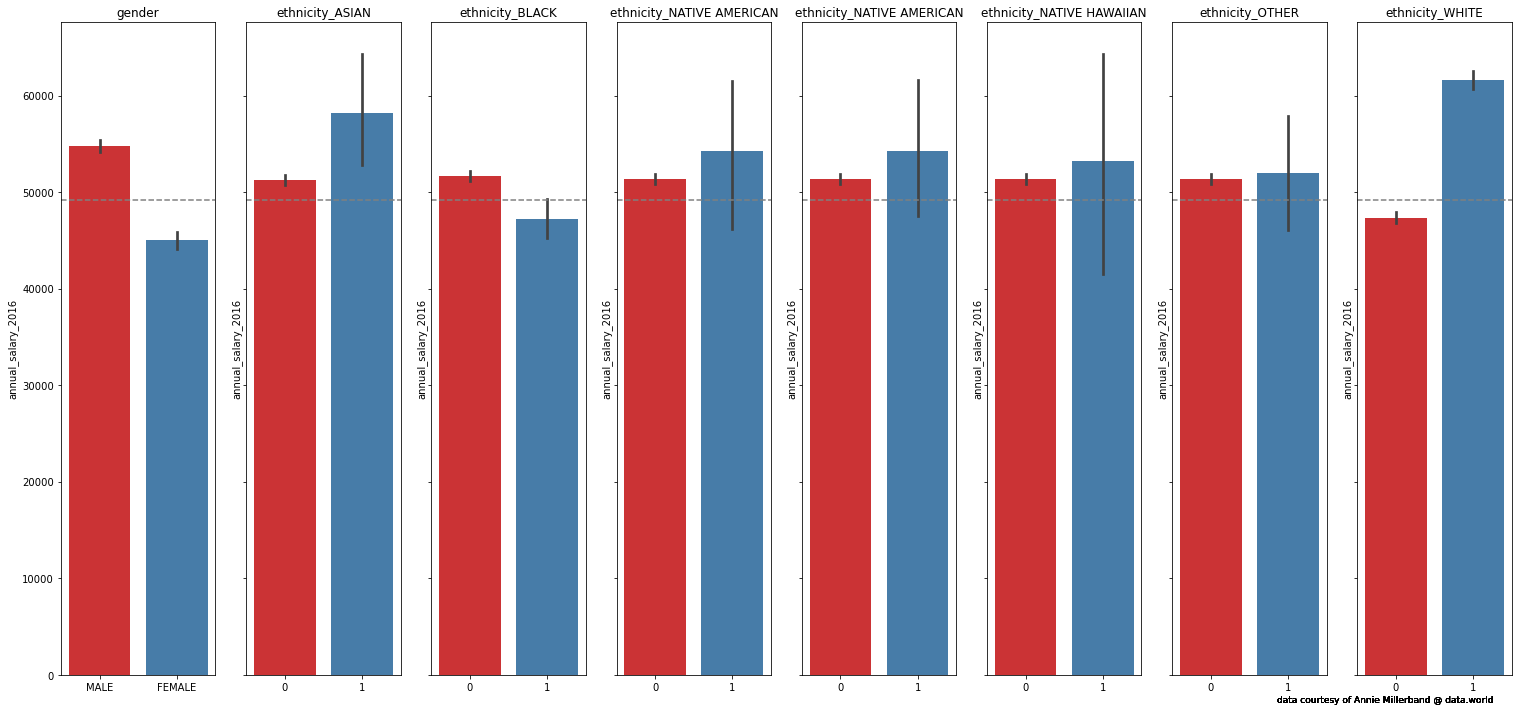

In [29]:
features = ['gender', 'ethnicity_ASIAN', 'ethnicity_BLACK', 'ethnicity_NATIVE AMERICAN','ethnicity_NATIVE AMERICAN', 'ethnicity_NATIVE HAWAIIAN','ethnicity_OTHER', 'ethnicity_WHITE']

median_salary = train.annual_salary_2016.median()
_, ax = plt.subplots(nrows=1, ncols=8, figsize=(26, 12), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'annual_salary_2016', data=train, ax=ax[i], alpha=1.0, palette= 'Set1')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('annual_salary_2016')
    ax[i].set_title(feature)
    ax[i].axhline(median_salary, ls='--', color='grey')
    
    plt.annotate('data courtesy of Annie Millerband @ data.world', (0,0), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top')

In [30]:
print(df.groupby(['gender']).annual_salary_2016.median())

print(train.groupby(['gender']).annual_salary_2016.median())

print(df.groupby(['ethnicity_BLACK', 'gender']).annual_salary_2016.median())

print(train.groupby(['ethnicity_BLACK', 'gender']).annual_salary_2016.median())

gender
FEMALE    38884.0
MALE      59004.0
Name: annual_salary_2016, dtype: float64
gender
FEMALE    38538.0
MALE      59004.0
Name: annual_salary_2016, dtype: float64
ethnicity_BLACK  gender
0                FEMALE    39202.5
                 MALE      59004.0
1                FEMALE    37032.0
                 MALE      48978.5
Name: annual_salary_2016, dtype: float64
ethnicity_BLACK  gender
0                FEMALE    38514.0
                 MALE      59004.0
1                FEMALE    38743.0
                 MALE      46045.5
Name: annual_salary_2016, dtype: float64


-----

<h3>Takeaways</h3>

- The median salary for everyone is above 50,000 except for those who identified as Black and employees who gender is Female.
- Breaking up those who identify as Black by gender also reveals salary disparity where males who are black have a median salary 13,000 lower than their co-workers who are not Black
- Is their a reason why those who indentify as black are lagging behind in median salary? 
- Is the city trying to interview a diverse group of candidates who all hold similiar qualifications?

----

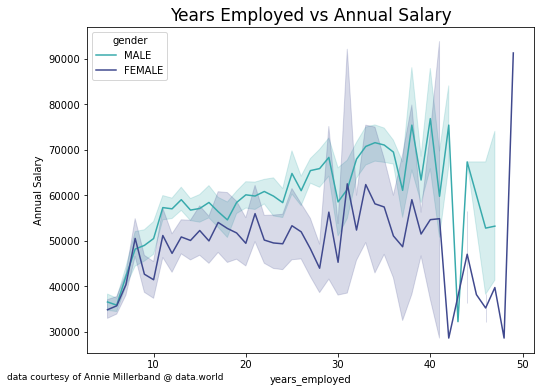

In [31]:
plt.figure('figure', figsize=(8, 6))
plt.title("Years Employed vs Annual Salary", fontsize=17)
ax = sns.lineplot(x="years_employed", y="annual_salary_2016", data=train, hue='gender', palette=sns.color_palette("mako_r", 2))
plt.ylabel('Annual Salary')

plt.annotate('data courtesy of Annie Millerband @ data.world', (0,0), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

- After an employee has been with the city for 8 years or so, the pay gap between gender shows Females consistently lagging behind their male counterparts

----

<h3>Hypothesis Testing</h3>

----

<b>Chi^2 Testing</b>

----

In [32]:
# Set our alpha
alpha = .05



Let's see if there is a relationship between gender and the department.

- <b>Null Hypothesis:</b> Gender is independent of department worked in.
- <b>Alternative Hypothesis:</b> Gender is not independent of department worked i.

------

In [33]:
# cross tab gender & department worked in
observed = pd.crosstab(train.gender, train.department)
observed

department,ANIMAL CARE SERVICES,AVIATION,BUILDING & EQUIPMENT SERVICES,CENTER CITY DEVELOPMENT & OPERATIONS,CITY ATTORNEY,CITY AUDITOR,CITY MANAGER'S OFFICE,CONVENTION & SPORTS FACILITIES,CONVENTION AND VISITORS BUREAU,DEPARTMENT FOR CULTURE & CREATIVE DEVELOPMENT,...,OFFICE HISTORIC PRESERVATION,OFFICE OF INNOVATION,OFFICE OF THE CITY CLERK,PARKS AND RECREATION,PLANNING AND COMMUNITY DEV,POLICE,PRE K 4 SA,SA METRO HEALTH DISTRICT,SOLID WASTE MANAGEMENT,TRANSPORTATION & CAPITAL IMPROV
gender,,,,,,,,,,,,,,,,,,,,,
FEMALE,36,73,30,36,28,5,3,54,34,5,...,6,2,11,90,19,412,252,135,34,70
MALE,26,184,60,50,15,8,1,106,11,2,...,4,2,6,262,10,1259,27,39,306,363


In [34]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [35]:
null_hypothesis = "Gender is independent of department worked in"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print( p)

We reject the hypothesis that Gender is independent of department worked in
0.0


-----

<h3> Takeaway:</h3>
   - The chi^2 test shows that there is a relatinship between gender and department.
   
   -----

---

Let's see if there is a relationship between ethnicity and the department.

- <b>Null Hypothesis:</b> Ethnicity is independent of department worked in.
- <b>Alternative Hypothesis:</b> Ethnicity is not independent of department worked in.

------

In [36]:
# cross ethnicity vs gender
observed = pd.crosstab(train.ethnicity, train.department)
observed

department,ANIMAL CARE SERVICES,AVIATION,BUILDING & EQUIPMENT SERVICES,CENTER CITY DEVELOPMENT & OPERATIONS,CITY ATTORNEY,CITY AUDITOR,CITY MANAGER'S OFFICE,CONVENTION & SPORTS FACILITIES,CONVENTION AND VISITORS BUREAU,DEPARTMENT FOR CULTURE & CREATIVE DEVELOPMENT,...,OFFICE HISTORIC PRESERVATION,OFFICE OF INNOVATION,OFFICE OF THE CITY CLERK,PARKS AND RECREATION,PLANNING AND COMMUNITY DEV,POLICE,PRE K 4 SA,SA METRO HEALTH DISTRICT,SOLID WASTE MANAGEMENT,TRANSPORTATION & CAPITAL IMPROV
ethnicity,,,,,,,,,,,,,,,,,,,,,
ASIAN,2,8,0,3,3,0,0,2,0,0,...,0,0,0,2,0,13,2,3,1,4
BLACK,4,21,1,5,1,1,1,11,1,0,...,1,0,3,22,3,91,30,27,37,11
HISPANIC,35,136,81,61,22,5,3,122,29,3,...,3,1,11,255,18,955,202,109,275,336
NATIVE AMERICAN,0,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,5,1,0,0,2
NATIVE HAWAIIAN,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
OTHER,1,4,0,2,0,0,0,1,0,0,...,0,0,0,2,0,9,1,5,2,1
WHITE,20,86,7,14,16,7,0,22,15,4,...,6,3,3,70,8,597,43,30,25,79


In [37]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [38]:
null_hypothesis = "Ethnicity is independent of department worked in"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print( p)

We reject the hypothesis that Ethnicity is independent of department worked in
3.0006657867591775e-114


-----

<h3> Takeaway:</h3>
   - The chi^2 test shows that there is a relatinship between ethnicity and department. Knowing this will probably lead to more findings in regards to median pay based on department make-up.
   
   -----

---

Let's see if there is a relationship between gender and the department.

- <b>Null Hypothesis:</b> Gender is independent of department worked in.
- <b>Alternative Hypothesis:</b> Gender is not independent of department worked in.

------

In [39]:
# cross ethnicity vs gender
observed = pd.crosstab(train.gender, train.department)
observed

department,ANIMAL CARE SERVICES,AVIATION,BUILDING & EQUIPMENT SERVICES,CENTER CITY DEVELOPMENT & OPERATIONS,CITY ATTORNEY,CITY AUDITOR,CITY MANAGER'S OFFICE,CONVENTION & SPORTS FACILITIES,CONVENTION AND VISITORS BUREAU,DEPARTMENT FOR CULTURE & CREATIVE DEVELOPMENT,...,OFFICE HISTORIC PRESERVATION,OFFICE OF INNOVATION,OFFICE OF THE CITY CLERK,PARKS AND RECREATION,PLANNING AND COMMUNITY DEV,POLICE,PRE K 4 SA,SA METRO HEALTH DISTRICT,SOLID WASTE MANAGEMENT,TRANSPORTATION & CAPITAL IMPROV
gender,,,,,,,,,,,,,,,,,,,,,
FEMALE,36,73,30,36,28,5,3,54,34,5,...,6,2,11,90,19,412,252,135,34,70
MALE,26,184,60,50,15,8,1,106,11,2,...,4,2,6,262,10,1259,27,39,306,363


In [40]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [41]:
null_hypothesis = "Gender is independent of department worked in"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print( p)

We reject the hypothesis that Gender is independent of department worked in
0.0


-----

<h3> Takeaway:</h3>
   - The chi^2 test shows that there is a relatinship between gender and department. After running several of these tests, it is apparent that gender and ethnic makeup are definitley related. Let's look at salary next.
   
   -----

---

Let's see if there is a relationship between gender and the annual_salary.

- <b>Null Hypothesis:</b> Gender is independent of annual salary.
- <b>Alternative Hypothesis:</b> Gender is not independent of annual salary.

------

In [42]:
observed = pd.crosstab(train.gender, train.annual_salary_2016)
observed

annual_salary_2016,18200.0,18720.0,18741.0,18750.0,19240.0,19760.0,20800.0,21230.0,21307.0,21320.0,...,166650.0,167665.0,168747.0,175267.0,176014.0,176788.0,180790.0,181800.0,186206.0,187788.0
gender,,,,,,,,,,,,,,,,,,,,,
FEMALE,27,31,58,7,7,6,23,0,1,22,...,0,1,0,0,0,0,1,1,0,1
MALE,25,24,41,7,5,2,32,1,1,29,...,1,0,1,1,1,1,0,0,1,0


In [43]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [44]:
null_hypothesis = "Gender is independent of annual salary"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the hypothesis that Gender is independent of annual salary
1.869665108808703e-129


-----

<h3> Takeaway:</h3>
   - The chi^2 test shows that there is a relatinship between gender and salary like I expected. Let's see if there is a relationship between salary and ethnicity next.
   
   -----

---

Let's see if there is a relationship between ethnicity and the annual_salary.

- <b>Null Hypothesis:</b> Ethnicity is independent of annual salary.
- <b>Alternative Hypothesis:</b> Ethnicity is not independent of annual salary.

------

In [45]:
# cross ethnicity vs annual salary
observed = pd.crosstab(train.ethnicity, train.annual_salary_2016)
observed

annual_salary_2016,18200.0,18720.0,18741.0,18750.0,19240.0,19760.0,20800.0,21230.0,21307.0,21320.0,...,166650.0,167665.0,168747.0,175267.0,176014.0,176788.0,180790.0,181800.0,186206.0,187788.0
ethnicity,,,,,,,,,,,,,,,,,,,,,
ASIAN,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
BLACK,10,11,3,2,1,1,4,0,0,7,...,0,0,0,0,0,0,0,0,0,0
HISPANIC,41,44,83,11,10,7,42,1,2,34,...,0,0,0,0,1,1,1,0,1,1
NATIVE AMERICAN,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
NATIVE HAWAIIAN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OTHER,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WHITE,0,0,12,1,1,0,8,0,0,8,...,1,1,1,1,0,0,0,1,0,0


In [46]:
null_hypothesis = "Ethnicity is independent of annual salary"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the hypothesis that Ethnicity is independent of annual salary
1.869665108808703e-129


-----

<h3> Takeaway:</h3>
   - The chi^2 test shows that there is a relatinship between ethnicity and salary. This data is based on fiscal year 2016. Have things changed since then? Does this city see this as an issue or is the reasonable explanation for the disparity that exists in regards to salary, gender, and ethnicity?
   
   -----

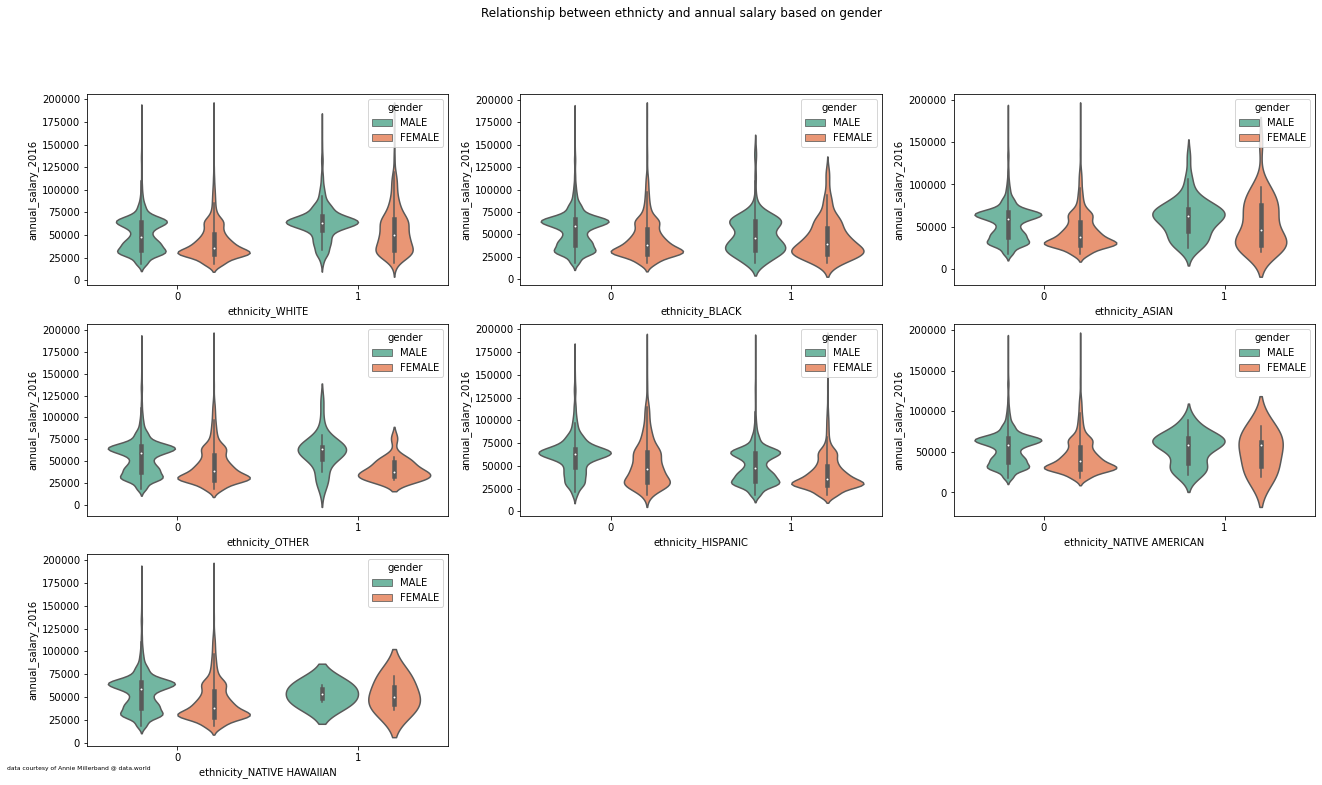

In [47]:
plt.figure(figsize = (22,12))



plt.subplot(331)
sns.violinplot(x='ethnicity_WHITE', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.subplot(332)
sns.violinplot(x='ethnicity_BLACK', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.subplot(333)
sns.violinplot(x='ethnicity_ASIAN', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.subplot(334)
sns.violinplot(x='ethnicity_OTHER', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.subplot(335)
sns.violinplot(x='ethnicity_HISPANIC', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.subplot(336)
sns.violinplot(x='ethnicity_NATIVE AMERICAN', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.subplot(337)
sns.violinplot(x='ethnicity_NATIVE HAWAIIAN', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.suptitle('Relationship between ethnicty and annual salary based on gender')

plt.annotate('data courtesy of Annie Millerband @ data.world', (0,0), (-80,-20), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

----

<h3>Reconfigure Tables For Further Analysis</h3>

---

In [48]:
dept_median_sal = df.groupby(['department', 'gender']).annual_salary_2016.median().reset_index(name='median_salary')

dept_median_sal.pivot_table(index=["department"], 
                    columns='gender', 
                    values=['median_salary'])

median_salary          
gender                                               FEMALE      MALE
department                                                           
ANIMAL CARE SERVICES                                34980.0   37238.0
AVIATION                                            34980.0   46912.5
BUILDING & EQUIPMENT SERVICES                       31956.0   34959.0
CENTER CITY DEVELOPMENT & OPERATIONS                34446.5   32952.0
CITY ATTORNEY                                       72762.0   87944.0
CITY AUDITOR                                        70886.0   94496.0
CITY MANAGER'S OFFICE                               48769.0   78519.0
CONVENTION & SPORTS FACILITIES                      33313.0   31709.0
CONVENTION AND VISITORS BUREAU                      59905.0   75959.0
DEPARTMENT FOR CULTURE & CREATIVE DEVELOPMENT       55705.0   53731.0
DEPARTMENT OF HUMAN SERVICES                        37779.0   46698.0
DEVELOPMENT SERVICES                                44426.5   46447.0
EASTPOINT                                           59498.5  135764.0
ECONOMIC DEVELOPMENT                                58590.5   71784.0
FINANCE                                             51645.0   55843.0
FIRE                                                60180.0   63480.0
GOVERNMENT & PUBLIC AFFAIRS                         40121.0   52216.5
HUMAN RESOURCES                                     20292.0   20800.0
ITSD                                                68072.0   65929.0
LIBRARY                                             32607.0   32607.0
MANAGEMENT AND BUDGET                               57067.5   62490.0
MAYOR AND CITY COUNCIL OFFICES                      48769.0   77098.5
MUNICIPAL COURTS                                    42517.0   41683.0
NON DEPARTMENTAL                                    70984.0   62852.0
OFFICE HISTORIC PRESERVATION                        58095.0   47213.0
OFFICE OF INNOVATION                                95870.0   99376.5
OFFICE OF THE CITY CLERK                            40571.0   35692.0
PARKS AND RECREATION                                37462.0   38212.0
PLANNING AND COMMUNITY DEV                          54998.5   57535.5
POLICE                                              41858.0   65700.0
PRE K 4 SA                                          28600.0   28600.0
SA METRO HEALTH DISTRICT                            38425.0   44299.0
SOLID WASTE MANAGEMENT                              35608.0   37807.0
TRANSPORTATION & CAPITAL IMPROV                     50262.0   39699.0

---

<h3>Takeaways</h3>

This table gives a clear side by side of median salary based on gender and department. For the most part, females are lagging behind their male counterparts.


----

In [49]:
ethnicity_dept_median_sal = df.groupby(['department', 'ethnicity']).annual_salary_2016.median().reset_index(name='median_salary')

ethnicity_dept_median_sal.pivot_table(index=["department"], 
                    columns='ethnicity', 
                    values=['median_salary'])

median_salary            \
ethnicity                                             ASIAN     BLACK   
department                                                              
ANIMAL CARE SERVICES                                31831.0   30187.5   
AVIATION                                            48089.0   38801.0   
BUILDING & EQUIPMENT SERVICES                       30198.0   46877.0   
CENTER CITY DEVELOPMENT & OPERATIONS                29320.0   33581.0   
CITY ATTORNEY                                       94273.0   62702.0   
CITY AUDITOR                                            NaN   52520.0   
CITY MANAGER'S OFFICE                                   NaN   46875.0   
CONVENTION & SPORTS FACILITIES                      70397.5   31709.0   
CONVENTION AND VISITORS BUREAU                      36728.0   75818.0   
DEPARTMENT FOR CULTURE & CREATIVE DEVELOPMENT           NaN   86865.0   
DEPARTMENT OF HUMAN SERVICES                        55598.0   42682.0   
DEVELOPMENT SERVICES                                80356.0   44389.0   
EASTPOINT                                           79298.0  135764.0   
ECONOMIC DEVELOPMENT                                67090.5   70700.0   
FINANCE                                             58673.5   45738.0   
FIRE                                                65988.0   63480.0   
GOVERNMENT & PUBLIC AFFAIRS                             NaN   36237.5   
HUMAN RESOURCES                                     21840.0   18741.0   
ITSD                                                77564.0   65571.5   
LIBRARY                                             30603.5   33010.0   
MANAGEMENT AND BUDGET                                   NaN   46950.0   
MAYOR AND CITY COUNCIL OFFICES                          NaN       NaN   
MUNICIPAL COURTS                                    32607.0   42942.0   
NON DEPARTMENTAL                                    47972.0   93748.0   
OFFICE HISTORIC PRESERVATION                            NaN   44947.5   
OFFICE OF INNOVATION                                    NaN       NaN   
OFFICE OF THE CITY CLERK                            31685.0   35274.0   
PARKS AND RECREATION                                43697.0   37247.0   
PLANNING AND COMMUNITY DEV                              NaN   86829.0   
POLICE                                              63168.0   63168.0   
PRE K 4 SA                                          48767.0   28600.0   
SA METRO HEALTH DISTRICT                            44943.0   43536.0   
SOLID WASTE MANAGEMENT                              42461.0   38542.0   
TRANSPORTATION & CAPITAL IMPROV                     71707.0   40096.0   

                                                                         \
ethnicity                                      HISPANIC NATIVE AMERICAN   
department                                                                
ANIMAL CARE SERVICES                            34956.5             NaN   
AVIATION                                        37807.0         32203.0   
BUILDING & EQUIPMENT SERVICES                   34659.0         31418.0   
CENTER CITY DEVELOPMENT & OPERATIONS            32203.0         82121.0   
CITY ATTORNEY                                   59394.0         87456.0   
CITY AUDITOR                                    76340.0             NaN   
CITY MANAGER'S OFFICE                           65786.0             NaN   
CONVENTION & SPORTS FACILITIES                  31572.0         49036.5   
CONVENTION AND VISITORS BUREAU                  55366.0             NaN   
DEPARTMENT FOR CULTURE & CREATIVE DEVELOPMENT   48696.0             NaN   
DEPARTMENT OF HUMAN SERVICES                    36699.0         57945.0   
DEVELOPMENT SERVICES                            45536.0         52653.0   
EASTPOINT                                       39699.0             NaN   
ECONOMIC DEVELOPMENT                            53614.5             NaN   
FINANCE                                         50454.0             N

---

<h3>Takeaways</h3>

Again, this table does a good job showing the distinct differences in median salary based on ethnicty for each department. 


----

In [50]:
job_name_median_sal = df.groupby(['job_name', 'gender']).annual_salary_2016.median().reset_index(name='median_salary')

job_pivot = job_name_median_sal.pivot_table(index=["job_name"], 
                    columns='gender', 
                    values=['median_salary'])

job_pivot.head()

median_salary         
gender                                     FEMALE     MALE
job_name                                                  
311 SERVICE REPRESENTATIVE                35637.0  38563.0
ACCESSIBILITY COMPLIANCE MANAGER          91230.0      NaN
ACCESSIBILITY COMPLIANCE SPECIALIST       49086.0  53681.0
ACCOUNTANT                                38855.5  38813.5
ACCOUNTANT II                             52632.0      NaN

In [51]:
# Create two new data frames; one based on dept, gender, ethnicty and annual salary, the other based on those features and employee count on ethnicity

df2 = df.groupby(['department', 'gender', 'ethnicity' ]).annual_salary_2016.median().reset_index(name='median_salary')
df3 = df.groupby(['department', 'gender', 'ethnicity']).ethnicity.count().reset_index(name='employee_count')

# Merge these two tables together so we can see employee counts based on department, gender, ethnicity, and median salary

df4 = pd.merge(df2, df3, how='left', on=['department', 'gender', 'ethnicity'], suffixes=['', '_'])
cols = ['department', 'gender', 'ethnicity', 'median_salary', 'employee_count']
df4 = df4[cols]

df4.head()

,department,gender,ethnicity,median_salary,employee_count
0,ANIMAL CARE SERVICES,FEMALE,ASIAN,31831.0,2
1,ANIMAL CARE SERVICES,FEMALE,HISPANIC,34980.0,37
2,ANIMAL CARE SERVICES,FEMALE,OTHER,40469.0,1
3,ANIMAL CARE SERVICES,FEMALE,WHITE,35268.0,31
4,ANIMAL CARE SERVICES,MALE,BLACK,30187.5,4


In [52]:
#Now the tables are merged, we can create a pivot table for easier viewing but leave out employee counts for now

df4_pivot = df4.pivot_table(index=["gender", "ethnicity"], 
                    columns='department', 
                    values=['median_salary'])

df4_pivot.head(14)

median_salary           \
department             ANIMAL CARE SERVICES AVIATION   
gender ethnicity                                       
FEMALE ASIAN                        31831.0  42682.0   
       BLACK                            NaN  36596.0   
       HISPANIC                     34980.0  33589.0   
       NATIVE AMERICAN                  NaN      NaN   
       NATIVE HAWAIIAN                  NaN      NaN   
       OTHER                        40469.0  33406.0   
       WHITE                        35268.0  48769.0   
MALE   ASIAN                            NaN  48639.5   
       BLACK                        30187.5  42682.0   
       HISPANIC                     34933.0  40481.0   
       NATIVE AMERICAN                  NaN  32203.0   
       NATIVE HAWAIIAN                  NaN  44159.0   
       OTHER                            NaN  60876.5   
       WHITE                        46813.0  55765.0   

                                                      \
department             BUILDING & EQUIPMENT SERVICES   
gender ethnicity                                       
FEMALE ASIAN                                     NaN   
       BLACK                                 46877.0   
       HISPANIC                              31418.0   
       NATIVE AMERICAN                           NaN   
       NATIVE HAWAIIAN                           NaN   
       OTHER                                     NaN   
       WHITE                                 48769.0   
MALE   ASIAN                                 30198.0   
       BLACK                                 47461.5   
       HISPANIC                              35950.0   
       NATIVE AMERICAN                       31418.0   
       NATIVE HAWAIIAN                           NaN   
       OTHER                                 28600.0   
       WHITE                                 34239.0   

                                                                           \
department             CENTER CITY DEVELOPMENT & OPERATIONS CITY ATTORNEY   
gender ethnicity                                                            
FEMALE ASIAN                                        29320.0       94273.0   
       BLACK                                        37388.0       66168.5   
       HISPANIC                                     32203.0       46884.5   
       NATIVE AMERICAN                              82121.0           NaN   
       NATIVE HAWAIIAN                                  NaN       72762.0   
       OTHER                                        32203.0           NaN   
       WHITE                                        53731.0      105992.0   
MALE   ASIAN                                        30154.5           NaN   
       BLACK                                        32203.0       62702.0   
       HISPANIC                                     32283.0       92341.0   
       NATIVE AMERICAN                                  NaN       87456.0   
       NATIVE HAWAIIAN                                  NaN           NaN   
       OTHER                                        28600.0           NaN   
       WHITE                                        58866.0       94134.0   

                                                           \
department             CITY AUDITOR CITY MANAGER'S OFFICE   
gender ethnicity                                            
FEMALE ASIAN                    NaN                   NaN   
       BLACK                52520.0               46875.0   
       HISPANIC             54828.0               48769.0   
       NATIVE AMERICAN          NaN                   NaN   
       NATIVE HAWAIIAN          NaN                   NaN   
       OTHER                    NaN                   NaN   
       WHITE                88880.0               62828.0   
MALE   ASIAN                    NaN                   NaN   
       BLACK                    NaN                   NaN   
       HISPANIC             92175.0               78519.0   
       NATIVE AMERICA

---

<h3>Takeaways</h3>

This table clearly lays out what was seen in the chi^2 testing. There are relationships between median salary, ethnicity, gender, and department. With more time, it would be advantageous to look into job title to get a better idea of jobs held based on gender and ethnicity and see median salary based on those filters.

----

<h3>Modeling</h3>

-----

In [53]:
# Seperate out our X and y values
X_train = train.drop(columns=['gender', 'department', 'ethnicity', 'job_name', 'job_id'])
y_train = train.gender

X_validate = validate.drop(columns=['gender', 'department', 'ethnicity', 'job_name', 'job_id'])
y_validate = validate.gender

X_test = test.drop(columns=['gender', 'department', 'ethnicity', 'job_name', 'job_id'])
y_test = test.gender

-----

<h3>Establish the Baseline</h3>

------

In [54]:
# The most frequenly observed outcome will be our baseline

train.gender.value_counts()

MALE      4355
FEMALE    2314
Name: gender, dtype: int64

In [55]:
baseline_accuracy = (round((train.gender == 'MALE').mean(), 2)* 100)

print(f'Our baseline accuracy is {baseline_accuracy}%')

Our baseline accuracy is 65.0%


-------

<h3>Logistic Regression Model</h3>

--------

In [56]:
# Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the features we're using
features = ['annual_salary_2016','base_pay_2016', 'leave_payout_2016', 'other_2016', 'overtime_2016', 'additional_compensation', 'total_compensation',
           'years_employed', 'ethnicity_ASIAN', 'ethnicity_BLACK', 'ethnicity_HISPANIC', 'ethnicity_NATIVE AMERICAN', 'ethnicity_NATIVE HAWAIIAN',
           'ethnicity_OTHER', 'ethnicity_WHITE']
# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

Baseline is 65.0
Accuracy of Logistic Regression classifier on training set: 0.70


In [57]:
# Let's determine logit1's metrics on validate
features = ['annual_salary_2016','base_pay_2016', 'leave_payout_2016', 'other_2016', 'overtime_2016', 'additional_compensation', 'total_compensation',
           'years_employed', 'ethnicity_ASIAN', 'ethnicity_BLACK', 'ethnicity_HISPANIC', 'ethnicity_NATIVE AMERICAN', 'ethnicity_NATIVE HAWAIIAN',
           'ethnicity_OTHER', 'ethnicity_WHITE']
y_pred = logit.predict(X_validate[features])

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_validate[features], y_validate)))

print('Logit1 model using salary data, ethnicity, and years employed')
print(classification_report(y_validate, y_pred))

Accuracy of Logistic Regression classifier on training set: 0.70
Logit1 model using salary data, ethnicity, and years employed
              precision    recall  f1-score   support

      FEMALE       0.58      0.45      0.51       992
        MALE       0.74      0.83      0.78      1867

    accuracy                           0.70      2859
   macro avg       0.66      0.64      0.64      2859
weighted avg       0.68      0.70      0.69      2859




---
<h3>Takeways</h3>

This model performed the poorest out of the four. It won't be considered.

----

-------

<h3>KNN Model</h3>

--------

In [58]:
# Now let's make the model
knn = KNeighborsClassifier()

In [59]:
features = ['annual_salary_2016','base_pay_2016', 'leave_payout_2016', 'other_2016', 'overtime_2016', 'additional_compensation', 'total_compensation',
           'years_employed', 'ethnicity_ASIAN', 'ethnicity_BLACK', 'ethnicity_HISPANIC', 'ethnicity_NATIVE AMERICAN', 'ethnicity_NATIVE HAWAIIAN',
           'ethnicity_OTHER', 'ethnicity_WHITE']

In [60]:
# Now let's train the model!
knn.fit(X_train[features], y_train)

# Let's check the accuracy
accuracy = knn.score(X_train[features], y_train)
print(f"accuracy is {accuracy:.3}")

accuracy is 0.799


In [61]:
# Evaluate the model
y_pred = knn.predict(X_train[features])

In [62]:
# Let's check our other classification metrics
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      FEMALE       0.72      0.69      0.70      2314
        MALE       0.84      0.86      0.85      4355

    accuracy                           0.80      6669
   macro avg       0.78      0.77      0.78      6669
weighted avg       0.80      0.80      0.80      6669



In [63]:
# Let's check the accuracy
accuracy = knn.score(X_validate[features], y_validate)
print(f"accuracy is {accuracy:.3}")

accuracy is 0.712


In [64]:
# Obtain the predictions from the model
y_pred = knn.predict(X_validate[features])

In [65]:
# Let's check our other classification metrics
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

      FEMALE       0.59      0.56      0.57       992
        MALE       0.77      0.79      0.78      1867

    accuracy                           0.71      2859
   macro avg       0.68      0.68      0.68      2859
weighted avg       0.71      0.71      0.71      2859




---
<h3>Takeways</h3>

KNN did well on the train data but lost alot of accuracy when it came to validate. This model won't be used.

----

-------

<h3>Random Forest</h3>

--------

In [66]:
features = ['annual_salary_2016','base_pay_2016', 'leave_payout_2016', 'other_2016', 'overtime_2016', 'additional_compensation', 'total_compensation',
           'years_employed', 'ethnicity_ASIAN', 'ethnicity_BLACK', 'ethnicity_HISPANIC', 'ethnicity_NATIVE AMERICAN', 'ethnicity_NATIVE HAWAIIAN',
           'ethnicity_OTHER', 'ethnicity_WHITE']

In [67]:
def get_metrics_binary(rf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    accuracy = rf.score(X_train[features], y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [68]:
# create the Random Forest Model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [69]:
rf.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [70]:
y_pred = rf.predict(X_train[features])

In [71]:
y_pred_proba = rf.predict_proba(X_train[features])

In [72]:
class_report = get_metrics_binary(rf)
class_report


    The accuracy for our model is 0.8481
    The True Positive Rate is 0.879, The False Positive Rate is 0.21,
    The True Negative Rate is 0.79, and the False Negative Rate is 0.121
    


,precision,recall,f1-score,support
FEMALE,0.776456,0.789542,0.782944,2314.000000
MALE,0.887164,0.879219,0.883174,4355.000000
accuracy,0.848103,0.848103,0.848103,0.848103
macro avg,0.831810,0.834381,0.833059,6669.000000
weighted avg,0.848751,0.848103,0.848396,6669.000000


In [73]:
print('Accuracy of Validate: {:.2f}'.format(rf.score(X_validate[features], y_validate)))

y_pred = rf.predict(X_validate[features])



print(classification_report(y_validate, y_pred))


Accuracy of Validate: 0.75
              precision    recall  f1-score   support

      FEMALE       0.64      0.61      0.62       992
        MALE       0.80      0.82      0.81      1867

    accuracy                           0.75      2859
   macro avg       0.72      0.71      0.72      2859
weighted avg       0.74      0.75      0.74      2859



---
<h3>Takeways</h3>

Random Forest did well on train and validate data. Precision and Recall were also fairly good. This model is in contention for the test data set.

----

-------

<h3>Decision Tree</h3>

--------

In [74]:
# Let's generate a blank, new Decision Tree model
# Be sure to set the max_depth argument
# clf = DecisionTreeClassifier(max_depth=3, random_state=123)

clf = DecisionTreeClassifier(max_depth=7, random_state=123)

# Now let's train our model on the training data
# fitting == training the model
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=7, random_state=123)

In [75]:
# Visualize the model so it can explain itself!

dot_data = export_graphviz(clf, feature_names= X_train.columns,rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('COSA_salary_decision_tree', view=True, format="pdf")

'COSA_salary_decision_tree.pdf'

In [76]:
# Now we'll make a set of predictions using this trained model
y_pred = clf.predict(X_train)

# Estimate the probabilities for each class
y_pred_proba = clf.predict_proba(X_train)

In [77]:
# Let's evaluate the model
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.77


In [78]:
class_report = classification_report(y_train, y_pred, output_dict=True)
pd.DataFrame(class_report).T

,precision,recall,f1-score,support
FEMALE,0.693308,0.622299,0.655887,2314.000000
MALE,0.809669,0.853731,0.831117,4355.000000
accuracy,0.773429,0.773429,0.773429,0.773429
macro avg,0.751488,0.738015,0.743502,6669.000000
weighted avg,0.769294,0.773429,0.770316,6669.000000


In [79]:
y_pred = clf.predict(X_validate)

In [80]:
# Compare actual y values from validate to predictions based on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

      FEMALE       0.64      0.56      0.60       992
        MALE       0.78      0.83      0.80      1867

    accuracy                           0.74      2859
   macro avg       0.71      0.70      0.70      2859
weighted avg       0.73      0.74      0.73      2859



---
<h3>Takeways</h3>

Decision Tree did the second best out of the four model but fell short of the Random Forest model. 

----

In [81]:

logreg_train_accuracy = logit.score(X_train[features], y_train)
decisiontree_train_accuracy = clf.score(X_train, y_train)
random_forest_train_accuracy = rf.score(X_train[features], y_train)
knn_train_accuracy = knn.score(X_train[features], y_train)

logreg_validate_accuracy = logit.score(X_validate[features], y_validate)
decisiontree_validate_accuracy = clf.score(X_validate, y_validate)
random_forest_validate_accuracy = rf.score(X_validate[features], y_validate)
knn_validate_accuracy = knn.score(X_validate[features], y_validate)
print('\n')
print(f'The baseline accuracy is {baseline_accuracy}%')
print('\n')

print(f"Logistic Regression Train Accuracy --- {logreg_train_accuracy:.2%}")
print(f"Decision Tree Train Accuracy --- {decisiontree_train_accuracy:.2%}")
print(f"Random Forest Train Accuracy --- {random_forest_train_accuracy:.2%}")
print(f"KNN Accuracy Train Accuracy --- {knn_train_accuracy:.2%}")
print('\n')
print(f"Logistic Regression Validate Accuracy --- {logreg_validate_accuracy:.2%}")
print(f"Decision Tree Validate Accuracy --- {decisiontree_validate_accuracy:.2%}")
print(f"Random Forest Validate Accuracy --- {random_forest_validate_accuracy:.2%}")
print(f"KNN Validate Accuracy --- {knn_validate_accuracy:.2%}")



The baseline accuracy is 65.0%


Logistic Regression Train Accuracy --- 69.74%
Decision Tree Train Accuracy --- 77.34%
Random Forest Train Accuracy --- 84.81%
KNN Accuracy Train Accuracy --- 79.94%


Logistic Regression Validate Accuracy --- 69.67%
Decision Tree Validate Accuracy --- 73.70%
Random Forest Validate Accuracy --- 74.57%
KNN Validate Accuracy --- 71.18%



<h3>Test Accuracy</h3>

- I chose to move forward with the Random Forest model as it performed better than all other models.

- Logistic Regression was the only model to peform below 70%.

- All models beat the baseline of 65%

-----

----

<h3>Test On Out-Sample Data</h3>

Random Forest is our choice

----

In [82]:
random_forest_test_accuracy = rf.score(X_test[features], y_test)
print(f"Random Forest Accuracy --- {random_forest_test_accuracy:.2%}")

Random Forest Accuracy --- 75.61%


----

<b>Let's Take A Look At How The Model</b>

---

In [83]:
run_model()

,Actual_Gender,Model_Predictions,Model_Probabilities
REF #,,,
10813,FEMALE,FEMALE,0.317292
1100,MALE,MALE,0.989238
5554,MALE,MALE,0.758551
10933,FEMALE,FEMALE,0.281459
2643,MALE,MALE,0.624311
...,...,...,...
7535,MALE,MALE,0.814952
6509,FEMALE,FEMALE,0.277255
11837,MALE,MALE,0.665670


--------

<h3>Key Takeaways, Recommendations, & Next Steps</h3>

Through this classification project I came away with the following <b> key takeways</b>:

- The City of San Antonio appears to have an problem with pay based on gender and on ethnicity.
- While maybe not intentional, the data does suggest that there is definite room for improvement.
- My model performed with 75% accuracy when prediciting gender based on features like salary and ethnicity. This shows me that there is enough of a difference between these featuers across gender that computer can identify gender


<b>Recommendations & next steps</b>:

- I would recommend the city to a more in depth look into why these pay gaps exist in their departments and what can be done to bring everything into greater parity across the board.

- More analysis needs to be done with a more current data set to see if this issue still persists in 2021. 
-----